# Programación como Herramienta para la Ingeniería 2020-2
## Ayudantía 4: Herramientas avanzadas en python
### Ayudante: Pablo Seisdedos (pcseisdedos@uc.cl)

## Parte 1: NetworkX - Geopandas - osmnx

Links de interés para graficar:

- https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.plot
- https://pypi.org/project/contextualized/
- https://geopandas.org/gallery/plotting_with_geoplot.html
- https://pypi.org/project/mapclassify/

In [1]:
import osmnx as ox
import fiona
import networkx as nx
import geopandas as gpd
import momepy
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

# Obteniendo la información

In [2]:
ox.config(use_cache=True, log_console=True)
place = 'Valdivia, Chile'
cf = '["highway"~"primary|secondary"]'#'["highway"~"motorway|motorway_link"]'
red_primaria = ox.graph_from_place(place, network_type='drive', custom_filter=cf)

In [3]:
type(red_primaria)

networkx.classes.multidigraph.MultiDiGraph

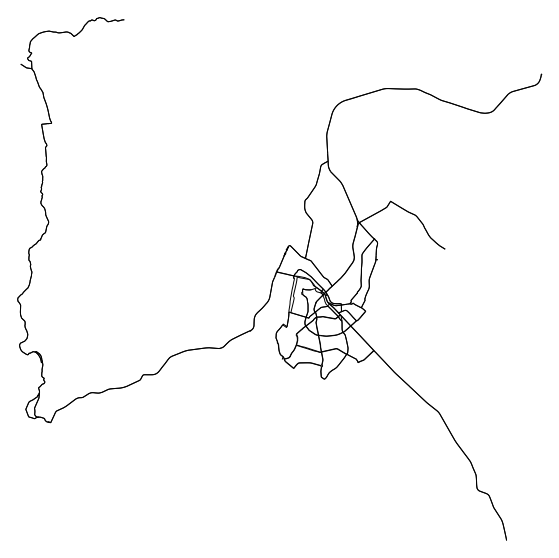

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [4]:
ox.plot_graph(red_primaria, figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

In [33]:
red_total = ox.graph_from_place(place, network_type='drive')

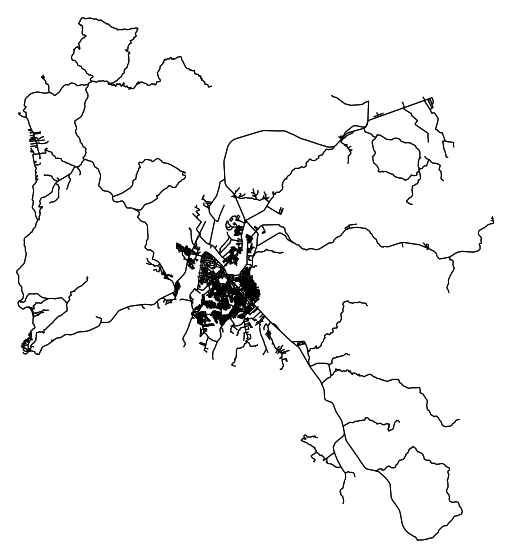

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [34]:
ox.plot_graph(red_total, figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

In [35]:
ox.save_graph_shapefile(red_primaria)
df_arcos_p = gpd.read_file('Data/graph_shapefile/edges.shp')
df_nodos_p = gpd.read_file('Data/graph_shapefile/nodes.shp')

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
ox.save_graph_shapefile(red_total)
df_arcos_t = gpd.read_file('Data/graph_shapefile/edges.shp')
df_nodos_t = gpd.read_file('Data/graph_shapefile/nodes.shp')

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Ploteo conjunto

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

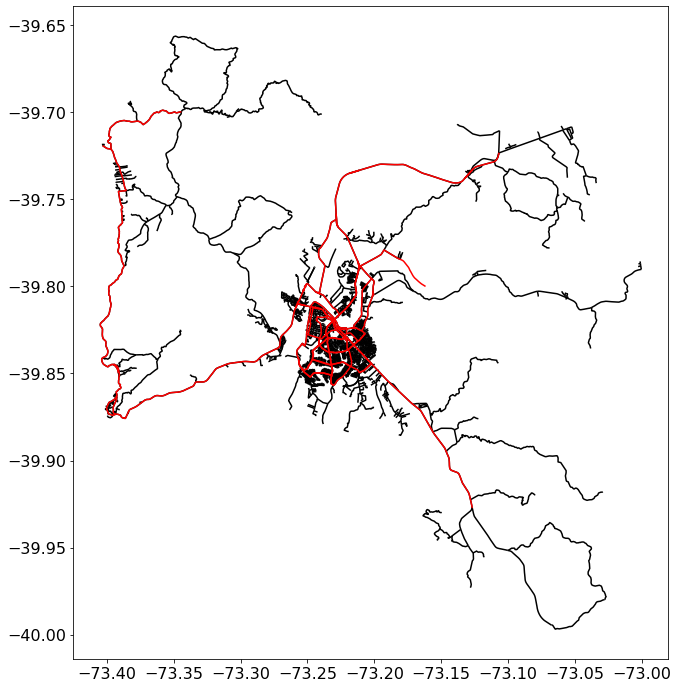

In [37]:
ax = df_arcos_t.plot(color = "black", figsize = (12,12))
df_arcos_p.plot(ax = ax, color = "red")

In [38]:
paraderos = ox.geometries.geometries_from_place('Valdivia, Chile', {"highway": "bus_stop"})

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
type(paraderos)

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

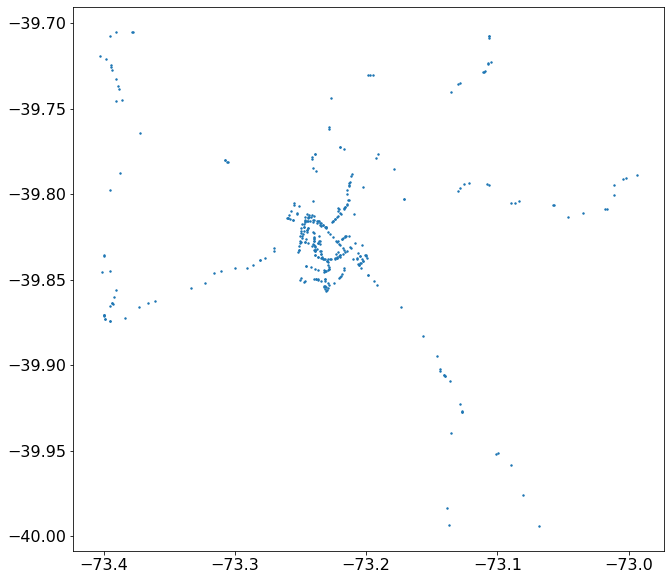

In [40]:
paraderos.plot(markersize = 2)

In [41]:
paraderos.crs

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
paraderos

,unique_id,osmid,element_type,bench,highway,name,network,shelter,geometry,bus,...,operator,covered,name:es,wheelchair,surface,source,addr:city,addr:street,passenger_information_display,name:en
0,node/1363720932,1363720932,node,no,bus_stop,20 - 4 - 1 - 3,20 - 4 - 3 - 1,yes,POINT (-73.23595 -39.81581),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/1368677662,1368677662,node,NaN,bus_stop,2,NaN,NaN,POINT (-73.24581 -39.82596),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/1369154318,1369154318,node,NaN,bus_stop,Campus Miraflores UACH,NaN,NaN,POINT (-73.25137 -39.83275),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node/1369154319,1369154319,node,NaN,bus_stop,"1, 3",NaN,NaN,POINT (-73.24975 -39.82777),yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node/1369154324,1369154324,node,NaN,bus_stop,"1, 3",NaN,NaN,POINT (-73.25065 -39.82736),yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,node/7807735193,7807735193,node,NaN,bus_stop,NaN,NaN,NaN,POINT (-73.23038 -39.85406),yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,node/7866665744,7866665744,node,NaN,bus_stop,NaN,NaN,NaN,POINT (-73.23131 -39.85106),yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,node/7876638402,7876638402,node,NaN,bus_stop,NaN,NaN,NaN,POINT (-73.21526 -39.82466),yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,node/7885927839,7885927839,node,NaN,bus_stop,NaN,NaN,NaN,POINT (-73.22931 -39.85215),yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
x, y = nx.get_node_attributes(red_primaria,"x"), nx.get_node_attributes(red_primaria,"y")

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
nodos = {_id:{"x":x[_id],"y":y[_id]} for _id in x}

c:\users\yopab\appdata\local\programs\python\python38\lib\asyncio\events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


In [45]:
nodos

{280622384: {'x': -73.2017049, 'y': -39.8064071},
 280626286: {'x': -73.4030925, 'y': -39.7192179},
 280629705: {'x': -73.2012016, 'y': -39.8045696},
 280632419: {'x': -73.2304098, 'y': -39.8193807},
 280636659: {'x': -73.2102073, 'y': -39.7883162},
 280636984: {'x': -73.2000549, 'y': -39.8046392},
 280638152: {'x': -73.2509568, 'y': -39.7989914},
 280639045: {'x': -73.250587, 'y': -39.8274997},
 280639906: {'x': -73.2021824, 'y': -39.8443537},
 280640696: {'x': -73.1270122, 'y': -39.9272165},
 309729685: {'x': -73.2321827, 'y': -39.8448759},
 309729695: {'x': -73.2338298, 'y': -39.8376943},
 309729712: {'x': -73.2348888, 'y': -39.8296961},
 309733178: {'x': -73.2198941, 'y': -39.8363261},
 309733493: {'x': -73.2408487, 'y': -39.833622},
 309733862: {'x': -73.2198112, 'y': -39.8364184},
 309739086: {'x': -73.2321489, 'y': -39.845028},
 309739137: {'x': -73.2351256, 'y': -39.8299223},
 309744751: {'x': -73.2457555, 'y': -39.811835},
 309751359: {'x': -73.2319569, 'y': -39.8183919},
 309

In [46]:
for point in paraderos.geometry:
    print(point.x, point.y)

-73.2359537 -39.815808
-73.2458092 -39.8259624
-73.2513655 -39.8327518
-73.2497515 -39.8277721
-73.250646 -39.8273627
-73.2508537 -39.8306269
-73.2411674 -39.812486
-73.2857902 -39.8414249
-73.2331313 -39.8377956
-73.22676 -39.8379595
-73.2203122 -39.8364067
-73.231576 -39.8449786
-73.231764 -39.8377394
-73.2096876 -39.8378968
-73.2059652 -39.8410907
-73.244622 -39.8130884
-73.2448468 -39.8154458
-73.2424435 -39.8158908
-73.2772182 -39.8373712
-73.2392586 -39.8325082
-73.2367932 -39.8365428
-73.2377496 -39.8318897
-73.251443 -39.806872
-73.2487941 -39.8176199
-73.2295192 -39.8388854
-73.2454697 -39.8420332
-73.2397214 -39.8299819
-73.2385962 -39.8356234
-73.2309995 -39.8192233
-73.2506023 -39.8287838
-73.2451304 -39.8118812
-73.23402 -39.8188696
-73.2222535 -39.828147
-73.2367559 -39.836769
-73.2312868 -39.8379771
-73.2496649 -39.8213037
-73.2466591 -39.8159956
-73.2459726 -39.8421975
-73.2484372 -39.8245558
-73.2499167 -39.8225479
-73.2488292 -39.8258318
-73.2398425 -39.8276941
-73.24

In [47]:
ox.get_nearest_node(red_primaria, (-39.8259624, -73.2458092))

1555291931

In [48]:
df_nodos_p

,y,x,osmid,highway,geometry
0,-39.806407,-73.201705,280622384,None,POINT (-73.20170 -39.80641)
1,-39.719218,-73.403092,280626286,None,POINT (-73.40309 -39.71922)
2,-39.804570,-73.201202,280629705,None,POINT (-73.20120 -39.80457)
3,-39.819381,-73.230410,280632419,traffic_signals,POINT (-73.23041 -39.81938)
4,-39.788316,-73.210207,280636659,None,POINT (-73.21021 -39.78832)
...,...,...,...,...,...
291,-39.836114,-73.237794,7271137638,None,POINT (-73.23779 -39.83611)
292,-39.840595,-73.257086,7737802325,None,POINT (-73.25709 -39.84059)
293,-39.820430,-73.231210,7935351940,None,POINT (-73.23121 -39.82043)
294,-39.820366,-73.231509,7935351946,None,POINT (-73.23151 -39.82037)


In [49]:
df_nodos_p["geometry"]

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      POINT (-73.20170 -39.80641)
1      POINT (-73.40309 -39.71922)
2      POINT (-73.20120 -39.80457)
3      POINT (-73.23041 -39.81938)
4      POINT (-73.21021 -39.78832)
                  ...             
291    POINT (-73.23779 -39.83611)
292    POINT (-73.25709 -39.84059)
293    POINT (-73.23121 -39.82043)
294    POINT (-73.23151 -39.82037)
295    POINT (-73.24896 -39.84552)
Name: geometry, Length: 296, dtype: geometry

In [50]:
df_arcos_p.head(5)

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,osmid,ref,name,highway,maxspeed,oneway,length,lanes,from,to,bridge,access,junction,u,v,key,geometry
0,"[25734753, 488878793, 823495852, 488880592, 48...",204,"['Los Girasoles', 'Cruce Ruta 5 (Los Lagos) - ...",primary,"['120', '50', '80']",0,2275.476,1,317640424,280622384,None,None,None,280622384,317640424,0,"LINESTRING (-73.20930 -39.82570, -73.20926 -39..."
1,635412362,204,Cruce Ruta 5 (Los Lagos) - Valdivia,primary,80,1,182.864,2,280622384,5993950064,None,None,None,280622384,5993950064,0,"LINESTRING (-73.20170 -39.80641, -73.20153 -39..."
2,727874595,204,Cruce Ruta 5 (Los Lagos) - Valdivia,primary,120,1,203.294,None,6821011835,280622384,None,None,None,280622384,6821011835,0,"LINESTRING (-73.20120 -39.80463, -73.20123 -39..."
3,335610062,T-350,Cruce Calle Los Robles (Valdivia) - Niebla - L...,secondary,None,0,607.196,None,1574475127,280626286,None,None,None,280626286,1574475127,0,"LINESTRING (-73.39672 -39.72135, -73.39690 -39..."
4,727874595,204,Cruce Ruta 5 (Los Lagos) - Valdivia,primary,120,1,6.732,None,280629705,6821011835,None,None,None,280629705,6821011835,0,"LINESTRING (-73.20120 -39.80457, -73.20120 -39..."


In [51]:
df_arcos_p.geometry

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      LINESTRING (-73.20930 -39.82570, -73.20926 -39...
1      LINESTRING (-73.20170 -39.80641, -73.20153 -39...
2      LINESTRING (-73.20120 -39.80463, -73.20123 -39...
3      LINESTRING (-73.39672 -39.72135, -73.39690 -39...
4      LINESTRING (-73.20120 -39.80457, -73.20120 -39...
                             ...                        
461    LINESTRING (-73.20216 -39.79578, -73.20202 -39...
462    LINESTRING (-73.20219 -39.79550, -73.20215 -39...
463    LINESTRING (-73.20176 -39.79580, -73.20181 -39...
464    LINESTRING (-73.23744 -39.83602, -73.23769 -39...
465    LINESTRING (-73.23151 -39.82037, -73.23145 -39...
Name: geometry, Length: 466, dtype: geometry

In [52]:
paraderos["cercano"] = paraderos.apply(lambda row: ox.get_nearest_node(red_primaria, (row.geometry.y,row.geometry.x)), axis = 1)

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
paraderos

,unique_id,osmid,element_type,bench,highway,name,network,shelter,geometry,bus,...,covered,name:es,wheelchair,surface,source,addr:city,addr:street,passenger_information_display,name:en,cercano
0,node/1363720932,1363720932,node,no,bus_stop,20 - 4 - 1 - 3,20 - 4 - 3 - 1,yes,POINT (-73.23595 -39.81581),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,447588221
1,node/1368677662,1368677662,node,NaN,bus_stop,2,NaN,NaN,POINT (-73.24581 -39.82596),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1555291931
2,node/1369154318,1369154318,node,NaN,bus_stop,Campus Miraflores UACH,NaN,NaN,POINT (-73.25137 -39.83275),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5035289536
3,node/1369154319,1369154319,node,NaN,bus_stop,"1, 3",NaN,NaN,POINT (-73.24975 -39.82777),yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1555291931
4,node/1369154324,1369154324,node,NaN,bus_stop,"1, 3",NaN,NaN,POINT (-73.25065 -39.82736),yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280639045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,node/7807735193,7807735193,node,NaN,bus_stop,NaN,NaN,NaN,POINT (-73.23038 -39.85406),yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896231007
376,node/7866665744,7866665744,node,NaN,bus_stop,NaN,NaN,NaN,POINT (-73.23131 -39.85106),yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1183008280
377,node/7876638402,7876638402,node,NaN,bus_stop,NaN,NaN,NaN,POINT (-73.21526 -39.82466),yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6283821183
378,node/7885927839,7885927839,node,NaN,bus_stop,NaN,NaN,NaN,POINT (-73.22931 -39.85215),yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1183008196


In [54]:
nodos[paraderos["cercano"][0]]

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'x': -73.234743, 'y': -39.8168101}

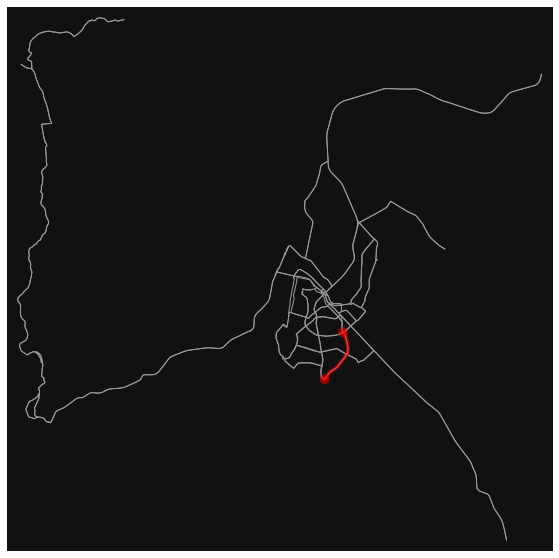

In [55]:
orig_node = paraderos["cercano"][10]
dest_node = paraderos["cercano"][150]

route1 = nx.shortest_path(red_primaria, orig_node, dest_node, weight = 'length')
fig, ax = ox.plot_graph_route(red_primaria, route1, node_size = 0, figsize=(10,10))

In [56]:
nx.shortest_path_length(red_primaria, orig_node, dest_node, weight = 'length')

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2778.635

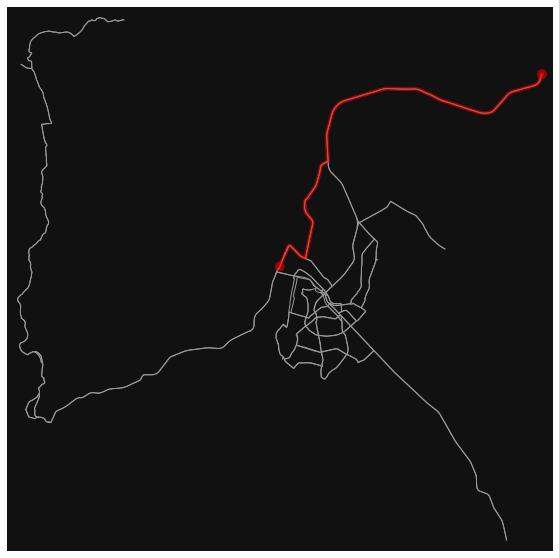

In [57]:
orig_node = ox.get_nearest_node(red_primaria, (-34.164603, -70.746707))
dest_node = ox.get_nearest_node(red_primaria, (-39.806872, -73.251443))

route2 = nx.shortest_path(red_primaria, orig_node, dest_node, weight = 'length')
fig, ax = ox.plot_graph_route(red_primaria, route2, node_size = 0, figsize=(10,10))

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


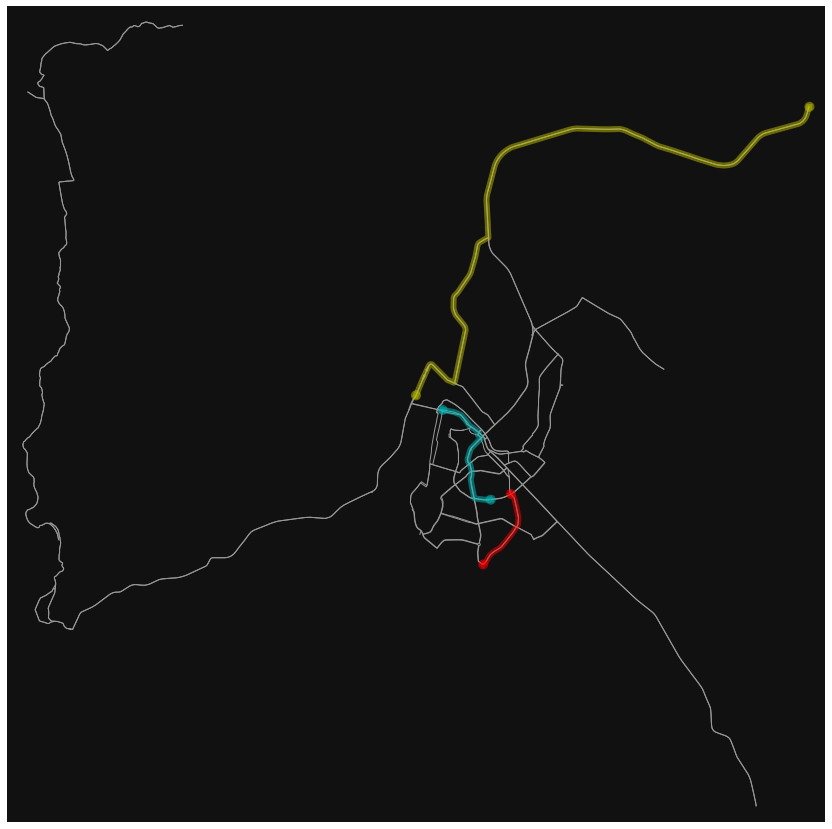

In [58]:
orig_node = paraderos["cercano"][250]
dest_node = paraderos["cercano"][30]
route3 = nx.shortest_path(red_primaria, orig_node, dest_node, weight = 'length')
routes = [route1, route2, route3]
rc = ['r', 'y', "c"]
fig, ax = ox.plot_graph_routes(red_primaria, routes, route_colors=rc, route_linewidth=6, node_size=0, figsize = (15,15))

# Se demora bastante en ejecutar

In [59]:
#G = ox.graph.graph_from_address("Santiago, Chile", dist=10000, dist_type='bbox', network_type='all_private', simplify=True)
#ox.plot_graph(G, figsize = (15,15), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

c:\users\yopab\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
fiona.supported_drivers['KML'] = 'rw'
fiona.supported_drivers['kml'] = 'rw'
#ox.save_graph_shapefile(G)
#df_arcos = gpd.read_file('Data/graph_shapefile/edges.shp')
#df_arcos.to_file("Santiago.kml", driver = "kml")